In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load and preprocess data
df = pd.read_csv("mongodb_data_export.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

In [3]:
# Forecast durations (15-min intervals)
forecast_steps = {
    '1 Day': 96,
    '1 Week': 672,
    '1 Month': 2880,
    '3 Months': 8640
}

In [4]:
# Function to evaluate each directory
def evaluate_directory(directory_df, directory_name):
    storage_series = directory_df['storage_gb']

    # Skip if not enough data
    if len(storage_series) < max(forecast_steps.values()) + 50:
        print(f" Skipping {directory_name} — Not enough data.\n")
        return

    # Plot trend
    plt.figure(figsize=(14, 4))
    plt.plot(storage_series, color='green')
    plt.title(f"Storage Trend - {directory_name}")
    plt.xlabel("Time")
    plt.ylabel("Storage (GB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Forecast & evaluate for each time window
    for label, steps in forecast_steps.items():
        train = storage_series[:-steps]
        test = storage_series[-steps:]

        # Fit model
        model = ExponentialSmoothing(train, trend='add', seasonal=None, initialization_method="estimated").fit()
        forecast = model.forecast(steps=steps)

        # Metrics
        rmse = np.sqrt(mean_squared_error(test, forecast))
        r2 = r2_score(test, forecast)
        mae = mean_absolute_error(test, forecast)

        # Plot forecast vs actual
        plt.figure(figsize=(12, 5))
        plt.plot(test.index, test, label='Actual', color='blue')
        plt.plot(test.index, forecast, label='Predicted', color='red')
        plt.title(f"{label} Forecast for {directory_name}")
        plt.xlabel("Time")
        plt.ylabel("Storage (GB)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print metrics
        print(f" Evaluation for {directory_name} - {label}:")
        print(f"   RMSE: {rmse:.2f}")
        print(f"   R² Score: {r2:.4f}")
        print(f"   MAE: {mae:.2f}")
        print("-" * 50)

In [5]:

# Loop through all unique directories
unique_dirs = df['directory'].unique()


Forecasting for directory: /scratch


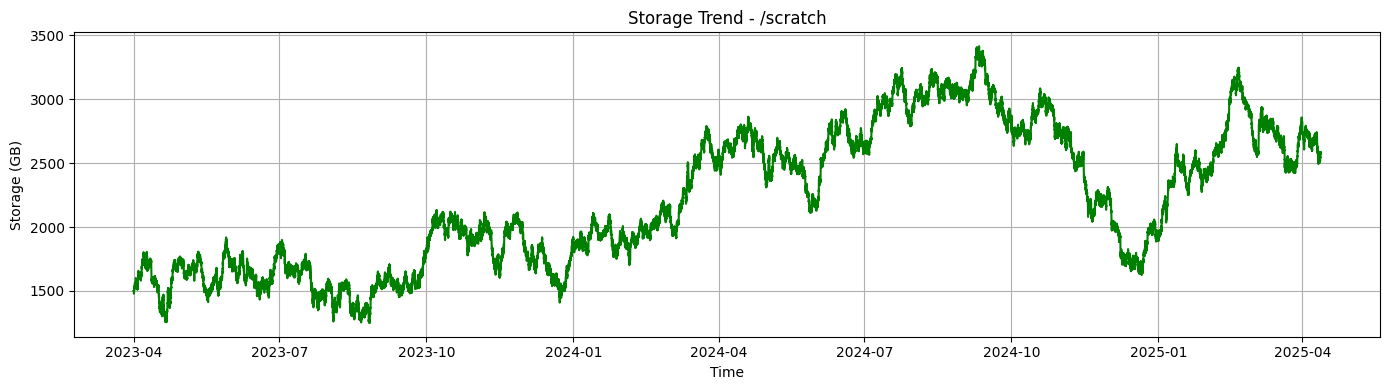

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


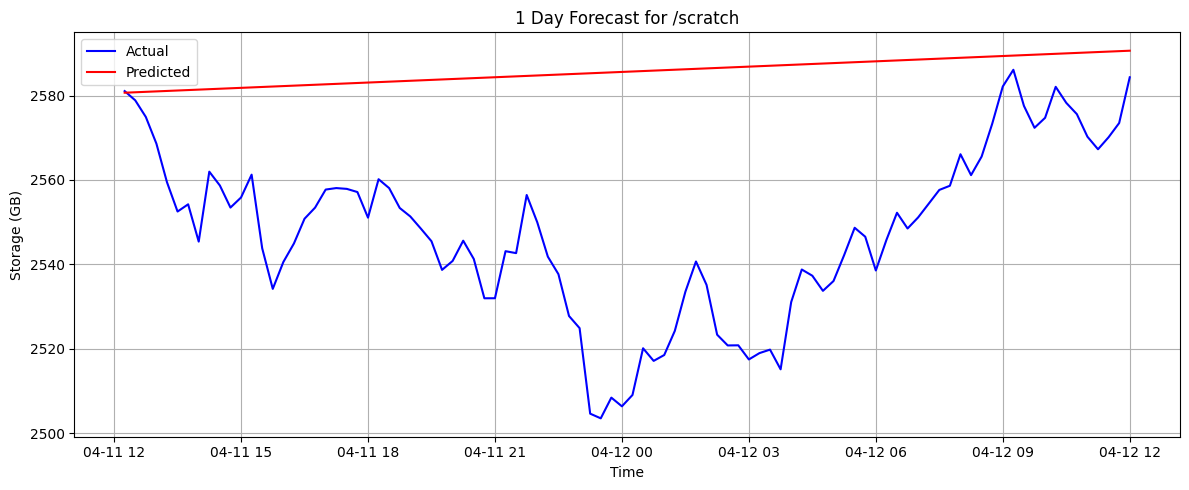

 Evaluation for /scratch - 1 Day:
   RMSE: 42.97
   R² Score: -3.5976
   MAE: 38.10
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


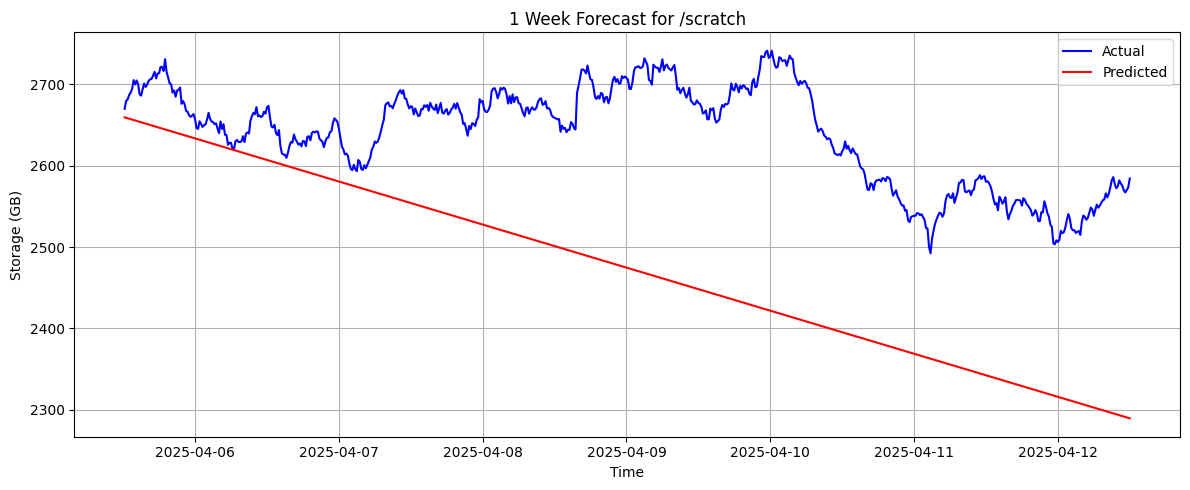

 Evaluation for /scratch - 1 Week:
   RMSE: 186.48
   R² Score: -8.4869
   MAE: 164.94
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


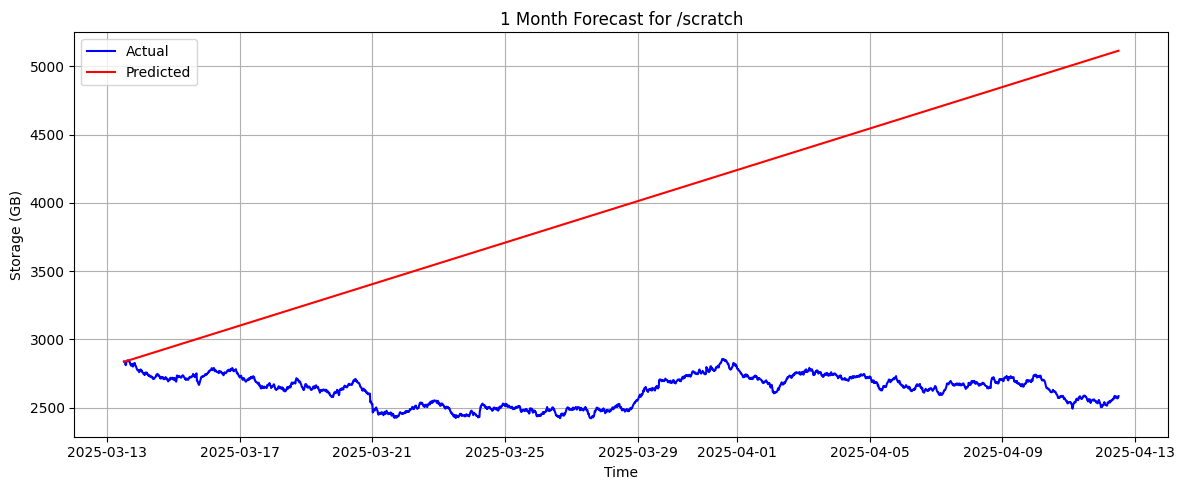

 Evaluation for /scratch - 1 Month:
   RMSE: 1497.48
   R² Score: -190.2323
   MAE: 1342.52
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


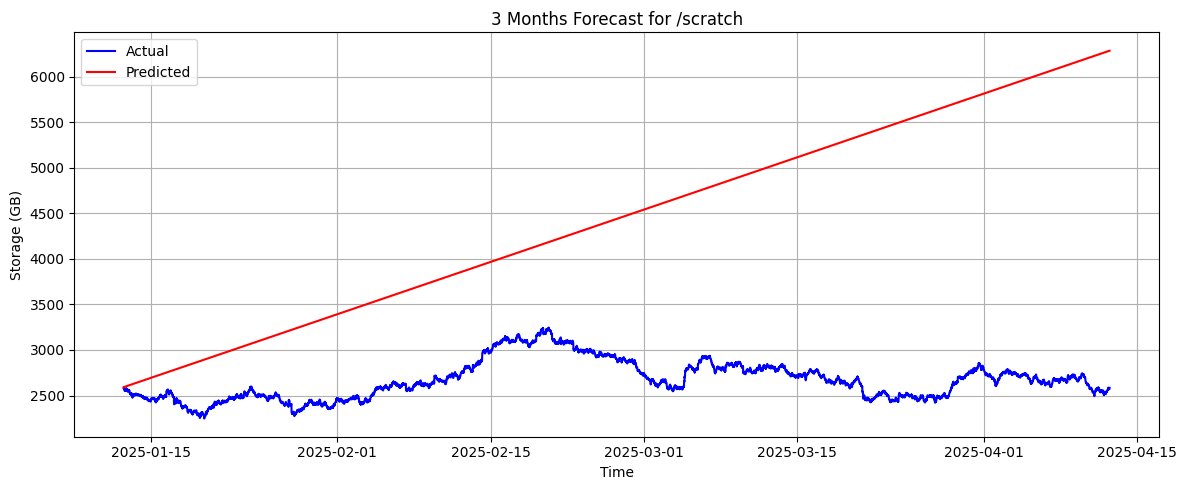

 Evaluation for /scratch - 3 Months:
   RMSE: 2049.14
   R² Score: -92.9332
   MAE: 1770.15
--------------------------------------------------

Forecasting for directory: /customer


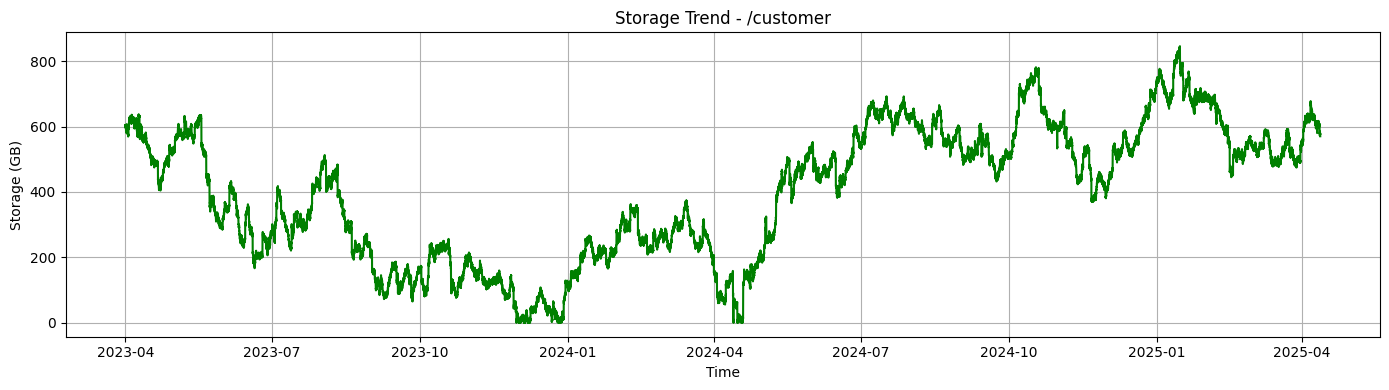

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


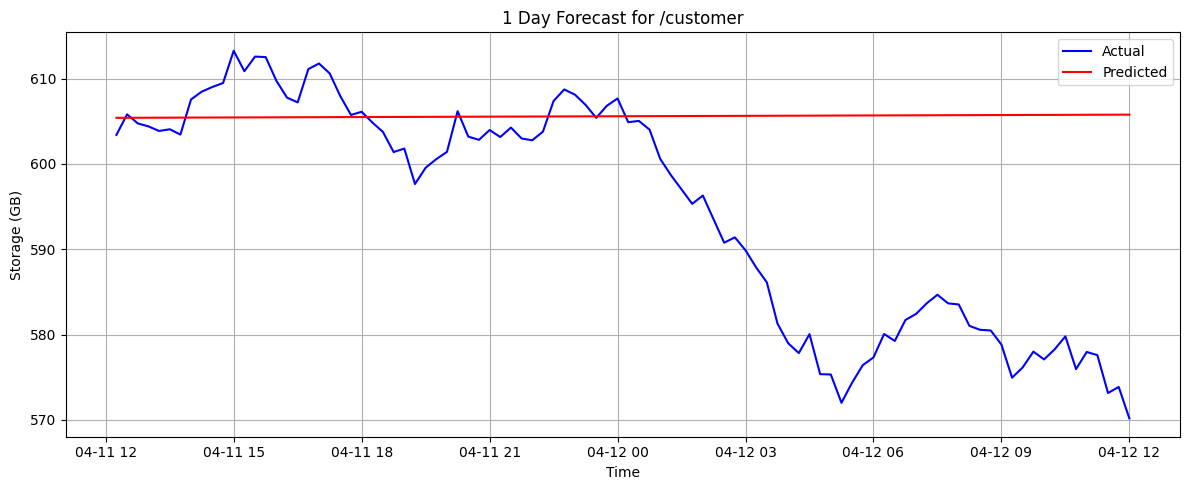

 Evaluation for /customer - 1 Day:
   RMSE: 17.22
   R² Score: -0.6945
   MAE: 12.62
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


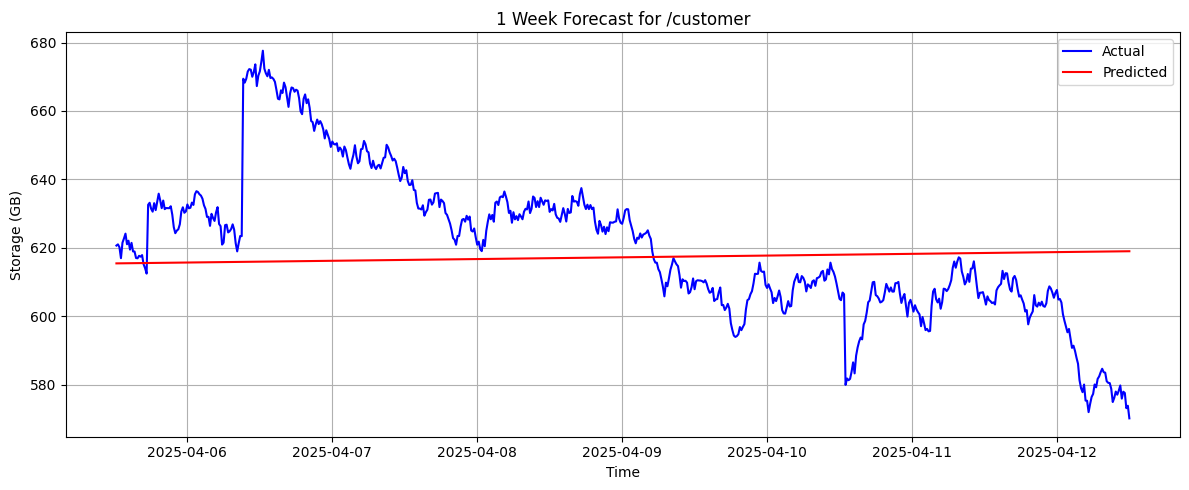

 Evaluation for /customer - 1 Week:
   RMSE: 22.59
   R² Score: -0.1076
   MAE: 18.21
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


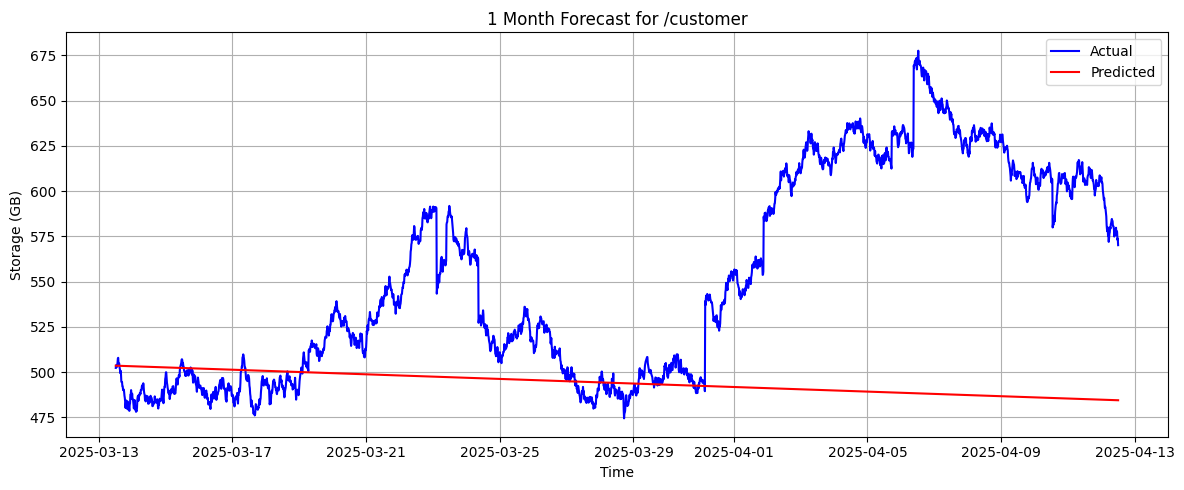

 Evaluation for /customer - 1 Month:
   RMSE: 83.96
   R² Score: -1.2266
   MAE: 62.96
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


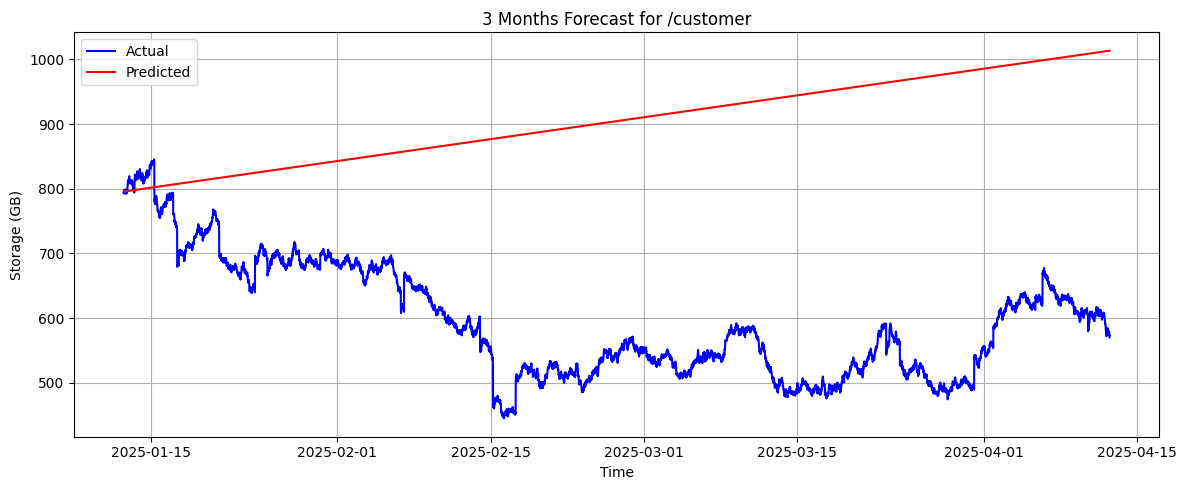

 Evaluation for /customer - 3 Months:
   RMSE: 338.41
   R² Score: -13.6182
   MAE: 310.49
--------------------------------------------------

Forecasting for directory: /info


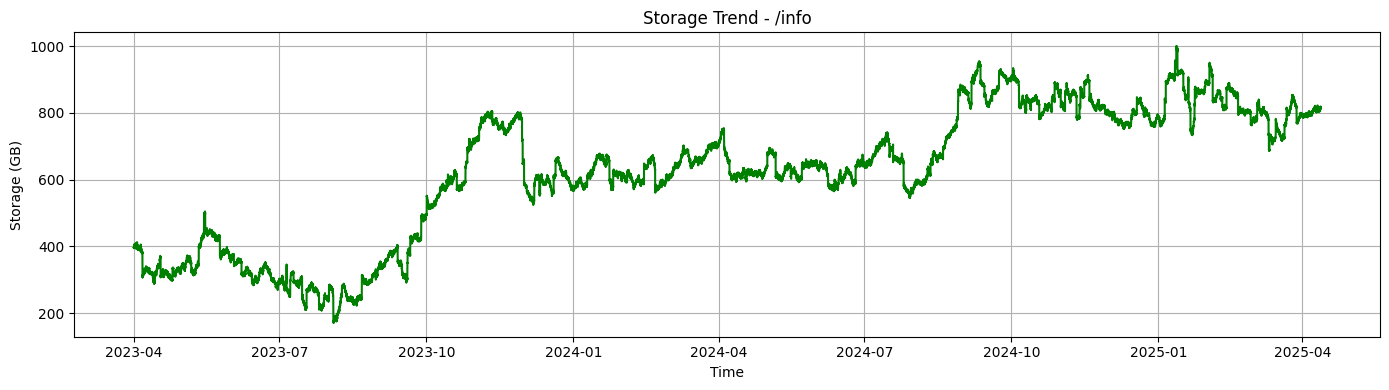

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


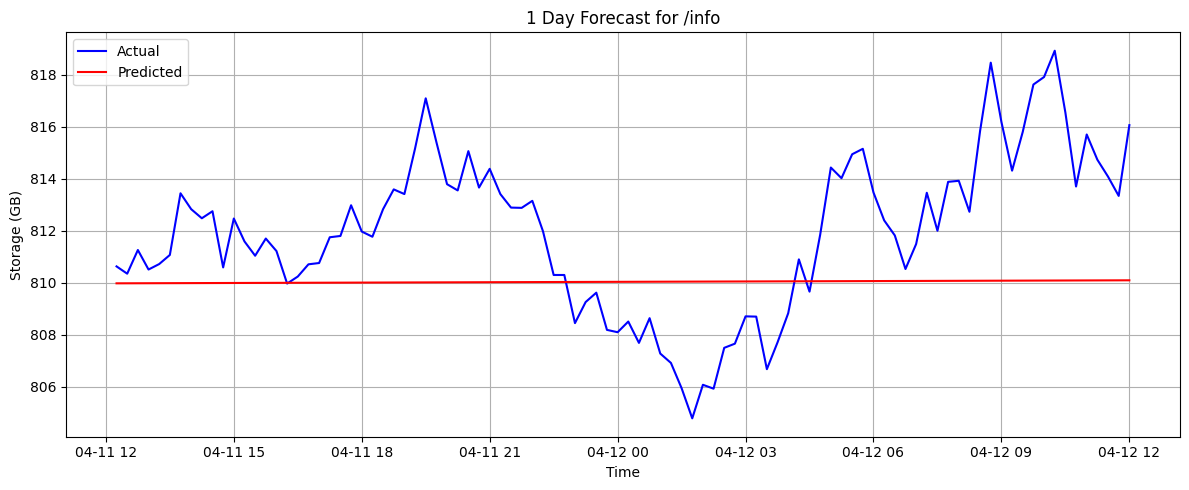

 Evaluation for /info - 1 Day:
   RMSE: 3.55
   R² Score: -0.3970
   MAE: 2.95
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


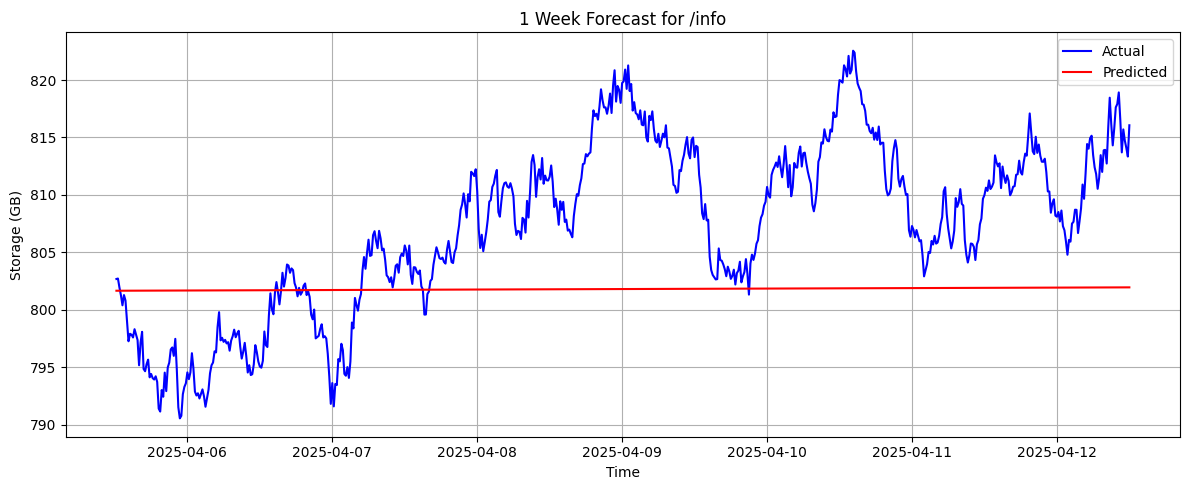

 Evaluation for /info - 1 Week:
   RMSE: 9.06
   R² Score: -0.5286
   MAE: 7.72
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


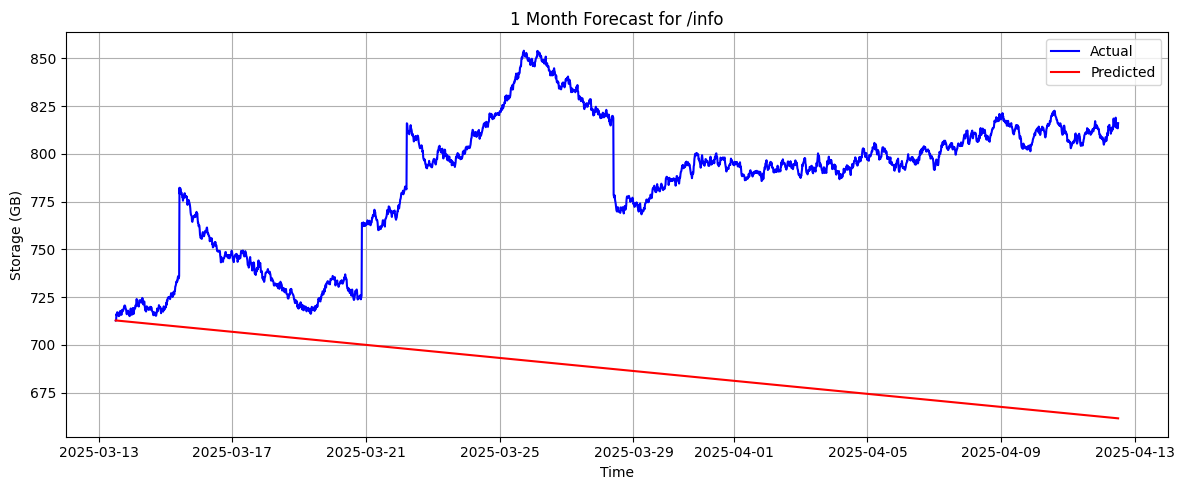

 Evaluation for /info - 1 Month:
   RMSE: 108.91
   R² Score: -8.9454
   MAE: 98.90
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


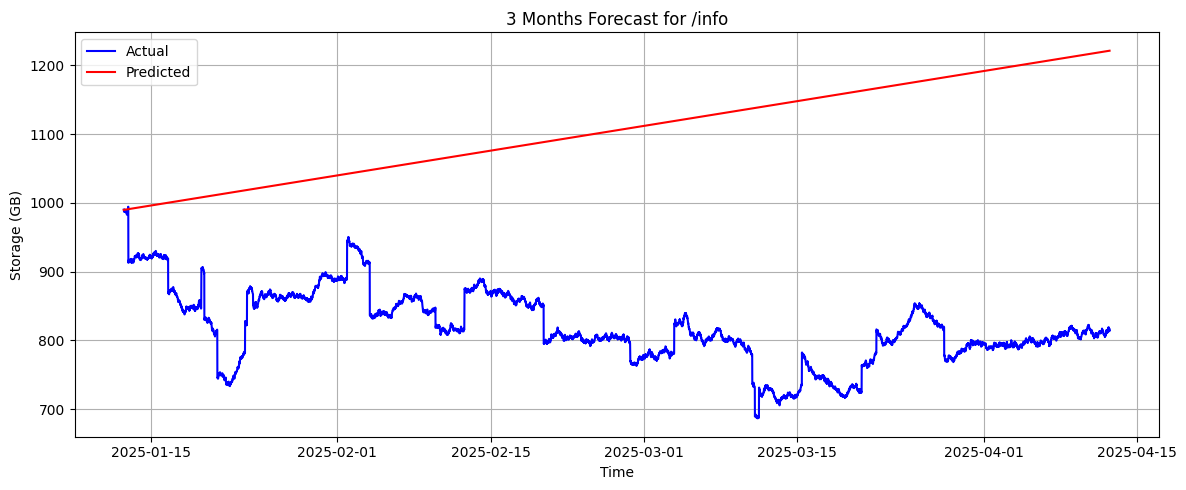

 Evaluation for /info - 3 Months:
   RMSE: 306.06
   R² Score: -32.7882
   MAE: 286.80
--------------------------------------------------

Forecasting for directory: /projects


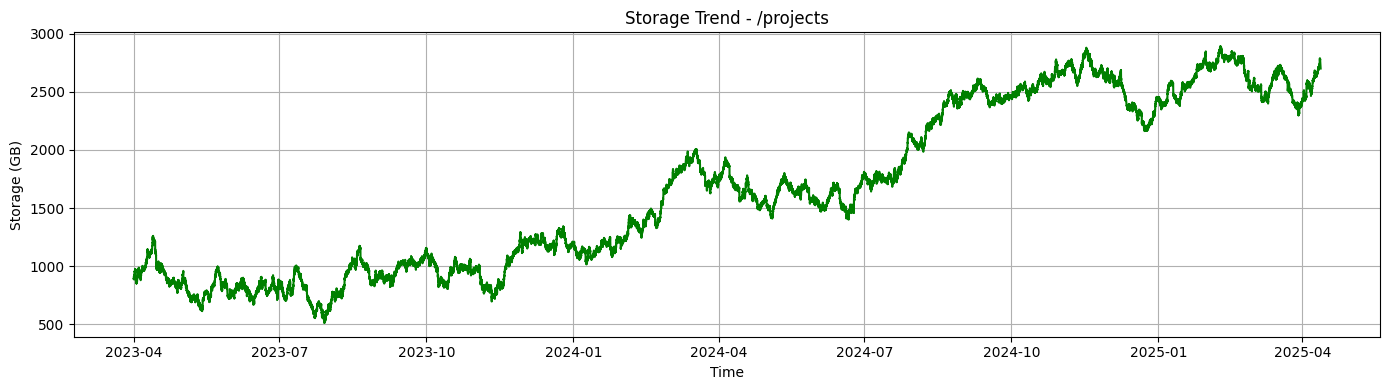

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


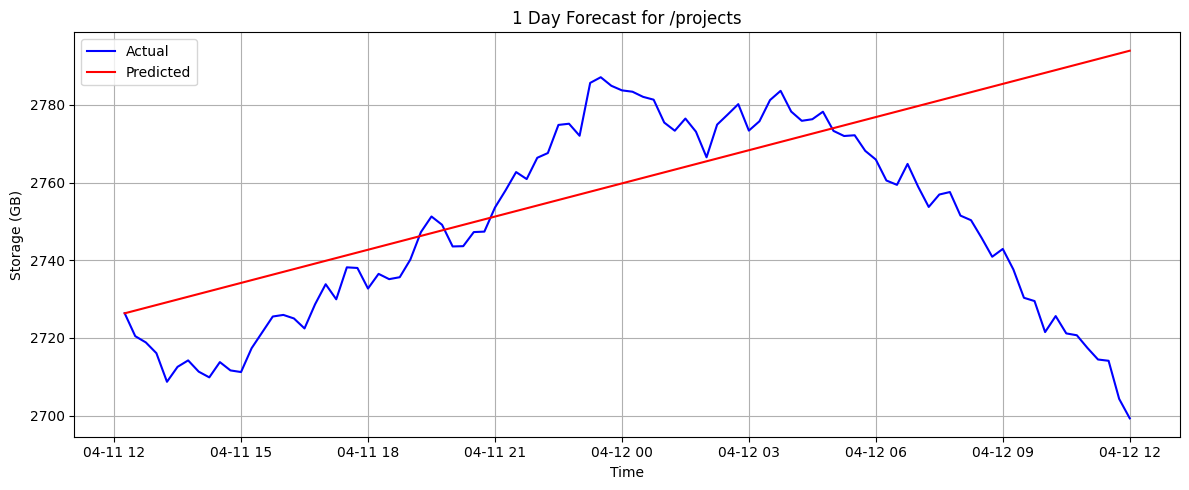

 Evaluation for /projects - 1 Day:
   RMSE: 29.64
   R² Score: -0.4240
   MAE: 20.62
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


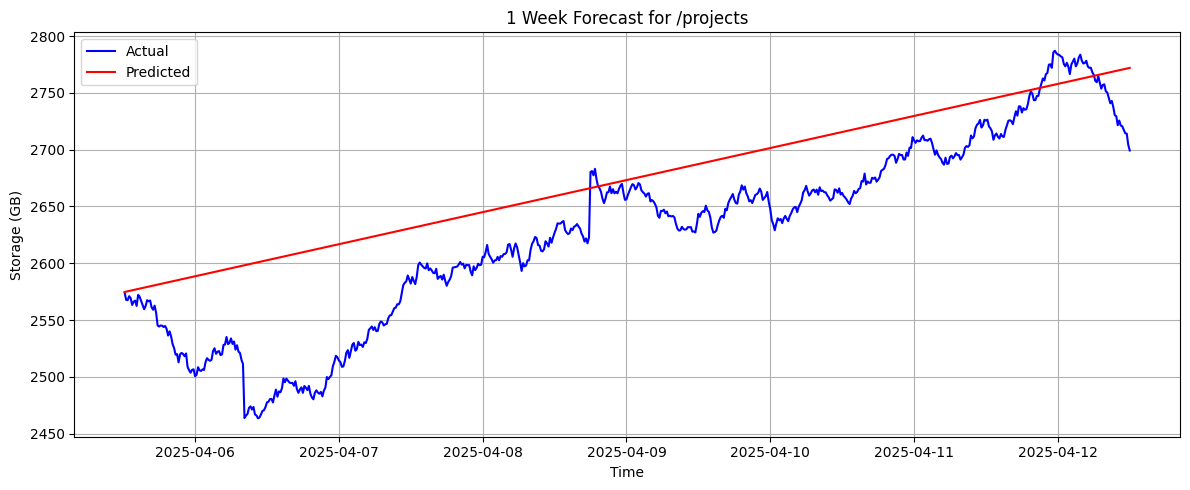

 Evaluation for /projects - 1 Week:
   RMSE: 58.32
   R² Score: 0.4893
   MAE: 48.96
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


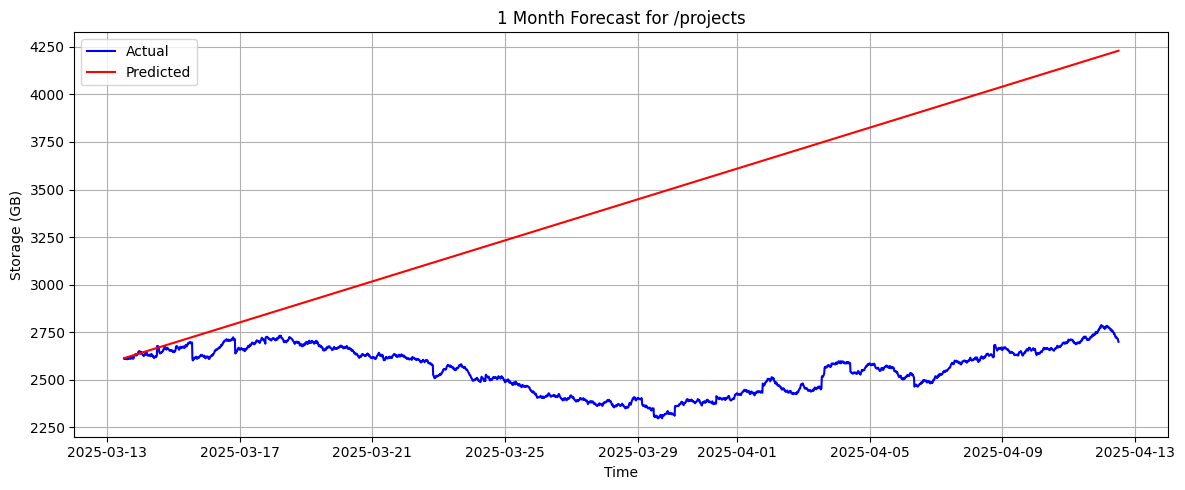

 Evaluation for /projects - 1 Month:
   RMSE: 999.16
   R² Score: -70.3120
   MAE: 866.75
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


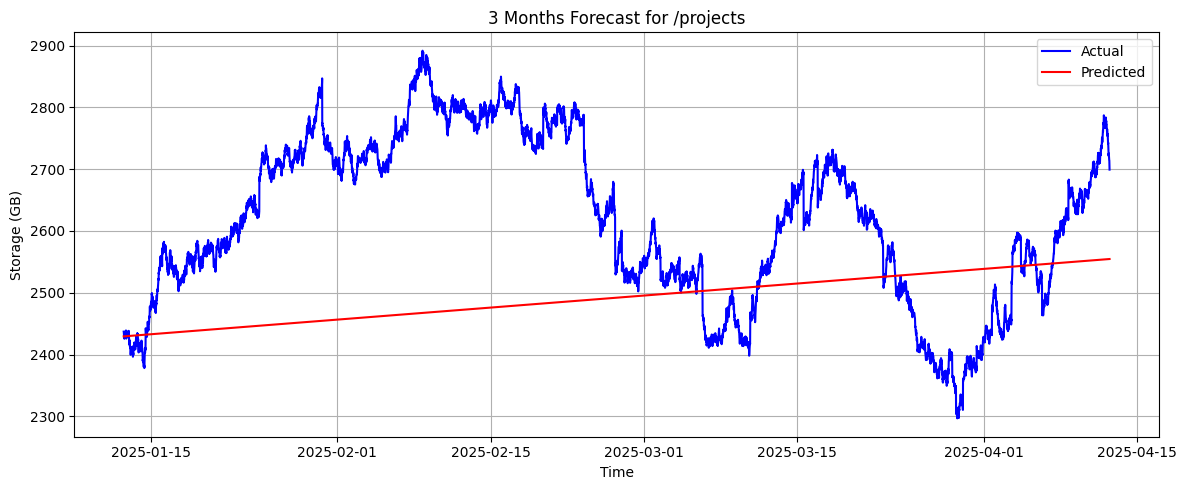

 Evaluation for /projects - 3 Months:
   RMSE: 194.98
   R² Score: -1.1346
   MAE: 161.95
--------------------------------------------------


In [6]:
for dir_name in unique_dirs:
    print(f"\nForecasting for directory: {dir_name}")
    dir_df = df[df['directory'] == dir_name]
    evaluate_directory(dir_df, dir_name)